In [1]:
import torch

In [2]:
import torch.utils.data as data

In [3]:
import torchvision

In [4]:
import matplotlib.pyplot as pyp

In [5]:
import torchvision.transforms as trans

In [6]:
import numpy as np

In [ ]:
import matplotlib.animation as animation

In [7]:
trainSet=torchvision.datasets.FashionMNIST('../',train=True,download=False,transform=trans.ToTensor())
testSet=torchvision.datasets.FashionMNIST('../',train=False,download=False,transform=trans.ToTensor())

In [8]:
trainLoader=data.DataLoader(trainSet,batch_size=256,shuffle=True)
testLoader=data.DataLoader(testSet,batch_size=256,shuffle=True)


In [12]:
LeNet=torch.nn.Sequential(torch.nn.Conv2d(1,6,padding=2,kernel_size=5),torch.nn.Sigmoid(),
              torch.nn.AvgPool2d(kernel_size=2,stride=2),
              torch.nn.Conv2d(6,16,kernel_size=5),torch.nn.Sigmoid(),
              torch.nn.AvgPool2d(kernel_size=2,stride=2),
              torch.nn.Flatten(),
              torch.nn.Linear(400,120),torch.nn.Sigmoid(),
              torch.nn.Linear(120,84),torch.nn.Sigmoid(),
              torch.nn.Linear(84,10))

In [13]:
print()

In [14]:
LeNet.cuda()

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Sigmoid()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Sigmoid()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

In [15]:
optim=torch.optim.SGD(LeNet.parameters(),lr=0.9)
loss=torch.nn.CrossEntropyLoss()
loss.cuda()

CrossEntropyLoss()

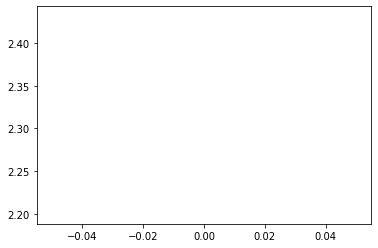

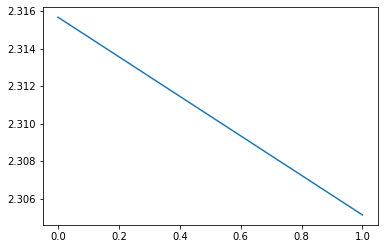

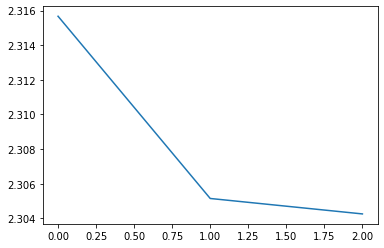

KeyboardInterrupt: 

In [16]:
num_epoch=20
aveLoss=torch.zeros(num_epoch)
aveLoss=aveLoss.detach().numpy()

for epoch in range(num_epoch):
    sumLoss=0
    trainnum=0;
    for trainData,trainLabel in trainLoader:
        optim.zero_grad()
        trainLabel=trainLabel.to(torch.device("cuda:0"))
        trainData=trainData.to(torch.device("cuda:0"))
        comLoss=loss(LeNet(trainData),trainLabel)
        comLoss.backward()
        optim.step()
        sumLoss=comLoss+sumLoss
        trainnum=trainnum+1
    aveLoss[epoch]=(sumLoss.to(torch.device("cpu"))/trainnum)    

pytorch中的crossentropy是softmax函数和crossentropy的结合
    1、Softmax后的数值都在0~1之间，所以ln之后值域是负无穷到0。

    2、然后将Softmax之后的结果取log，将乘法改成加法减少计算量，同时保障函数的单调性 。

    3、NLLLoss的结果就是把上面的输出与Label对应的那个值拿出来(下面例子中就是：将log_output\logsoftmax_output中与y_target对应的值拿出来)，去掉负号，再求均值。

正常来讲，多分类网络中需要最终输出层有softmax，保证输出变成0-1的概率，但pytorch中交叉熵损失已经加入softmax了，这也是为什么最终输出不需要激活函数的原因
另外，层与层之间需要加入激活函数，防止梯度爆炸